In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, r2_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./processed_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연령      2092 non-null   int64  
 1   종교      2092 non-null   int64  
 2   직업      2092 non-null   float64
 3   혼인상태    2092 non-null   int64  
 4   교육수준    2092 non-null   int64  
 5   건강상태    2092 non-null   int64  
 6   전체 만족도  2092 non-null   int64  
 7   소득수준    2092 non-null   int64  
 8   활동성     2092 non-null   int64  
 9   target  2092 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 163.6 KB


#### 모델 생성

In [3]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=2022)

In [60]:
lgbm = LGBMClassifier(max_depth=-1, n_estimators=300, learning_rate=0.1, application='multiclass', random_state=2022)

In [61]:
evals = [(X_test, y_test)]
#lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='multi_logloss', eval_set=evals , verbose=True)
lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='multi_logloss', eval_set=evals)

[1]	valid_0's multi_logloss: 1.1264
[2]	valid_0's multi_logloss: 1.11571
[3]	valid_0's multi_logloss: 1.10946
[4]	valid_0's multi_logloss: 1.10354
[5]	valid_0's multi_logloss: 1.10008
[6]	valid_0's multi_logloss: 1.10009
[7]	valid_0's multi_logloss: 1.10217
[8]	valid_0's multi_logloss: 1.10083
[9]	valid_0's multi_logloss: 1.10412
[10]	valid_0's multi_logloss: 1.10836
[11]	valid_0's multi_logloss: 1.111
[12]	valid_0's multi_logloss: 1.11108
[13]	valid_0's multi_logloss: 1.11498
[14]	valid_0's multi_logloss: 1.11753
[15]	valid_0's multi_logloss: 1.12179
[16]	valid_0's multi_logloss: 1.12598
[17]	valid_0's multi_logloss: 1.12939
[18]	valid_0's multi_logloss: 1.13119
[19]	valid_0's multi_logloss: 1.13252
[20]	valid_0's multi_logloss: 1.13517
[21]	valid_0's multi_logloss: 1.13964
[22]	valid_0's multi_logloss: 1.14241
[23]	valid_0's multi_logloss: 1.14587
[24]	valid_0's multi_logloss: 1.15058
[25]	valid_0's multi_logloss: 1.15466
[26]	valid_0's multi_logloss: 1.15921
[27]	valid_0's multi_log

LGBMClassifier(application='multiclass', n_estimators=300, random_state=2022)

In [62]:
predict_test = lgbm.predict(X_test)
predict_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
lgbm.score(X_test, y_test)

0.6420047732696897

#### boosting type에 따라 비교

In [64]:
# default boosting type : gbdt
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 2022,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'application': 'multiclass'}

In [65]:
lgbm.score(X_test, y_test)

0.6420047732696897

In [66]:
# boosting type : dart
lgbm_dart = LGBMClassifier(max_depth=-1, n_estimators=300, boosting_type='dart', learning_rate=0.1, application='multiclass', random_state=2022)
lgbm_dart.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='multi_logloss', eval_set=evals)

[1]	valid_0's multi_logloss: 1.1264
[2]	valid_0's multi_logloss: 1.11571
[3]	valid_0's multi_logloss: 1.10946
[4]	valid_0's multi_logloss: 1.10354
[5]	valid_0's multi_logloss: 1.10008
[6]	valid_0's multi_logloss: 1.10009
[7]	valid_0's multi_logloss: 1.10217
[8]	valid_0's multi_logloss: 1.10083
[9]	valid_0's multi_logloss: 1.10412
[10]	valid_0's multi_logloss: 1.10836
[11]	valid_0's multi_logloss: 1.111
[12]	valid_0's multi_logloss: 1.11108
[13]	valid_0's multi_logloss: 1.11498
[14]	valid_0's multi_logloss: 1.11753
[15]	valid_0's multi_logloss: 1.11706
[16]	valid_0's multi_logloss: 1.11537
[17]	valid_0's multi_logloss: 1.1139
[18]	valid_0's multi_logloss: 1.11818
[19]	valid_0's multi_logloss: 1.11856
[20]	valid_0's multi_logloss: 1.11627
[21]	valid_0's multi_logloss: 1.1201
[22]	valid_0's multi_logloss: 1.12409
[23]	valid_0's multi_logloss: 1.1218
[24]	valid_0's multi_logloss: 1.12712
[25]	valid_0's multi_logloss: 1.13096
[26]	valid_0's multi_logloss: 1.13302
[27]	valid_0's multi_loglos

[221]	valid_0's multi_logloss: 1.2528
[222]	valid_0's multi_logloss: 1.25131
[223]	valid_0's multi_logloss: 1.25549
[224]	valid_0's multi_logloss: 1.25868
[225]	valid_0's multi_logloss: 1.26215
[226]	valid_0's multi_logloss: 1.26533
[227]	valid_0's multi_logloss: 1.2698
[228]	valid_0's multi_logloss: 1.26709
[229]	valid_0's multi_logloss: 1.26498
[230]	valid_0's multi_logloss: 1.26928
[231]	valid_0's multi_logloss: 1.26711
[232]	valid_0's multi_logloss: 1.26491
[233]	valid_0's multi_logloss: 1.2632
[234]	valid_0's multi_logloss: 1.26742
[235]	valid_0's multi_logloss: 1.26573
[236]	valid_0's multi_logloss: 1.26414
[237]	valid_0's multi_logloss: 1.26233
[238]	valid_0's multi_logloss: 1.26036
[239]	valid_0's multi_logloss: 1.25857
[240]	valid_0's multi_logloss: 1.26381
[241]	valid_0's multi_logloss: 1.26798
[242]	valid_0's multi_logloss: 1.26578
[243]	valid_0's multi_logloss: 1.26377
[244]	valid_0's multi_logloss: 1.26157
[245]	valid_0's multi_logloss: 1.25973
[246]	valid_0's multi_loglos

LGBMClassifier(application='multiclass', boosting_type='dart', n_estimators=300,
               random_state=2022)

In [67]:
lgbm_dart.score(X_test, y_test)

0.6276849642004774

In [68]:
# boosting type : goss
lgbm_goss = LGBMClassifier(max_depth=-1, n_estimators=300, boosting_type='goss', learning_rate=0.1, application='multiclass', random_state=2022)
lgbm_goss.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='multi_logloss', eval_set=evals)

[1]	valid_0's multi_logloss: 1.1264
[2]	valid_0's multi_logloss: 1.11571
[3]	valid_0's multi_logloss: 1.10946
[4]	valid_0's multi_logloss: 1.10354
[5]	valid_0's multi_logloss: 1.10008
[6]	valid_0's multi_logloss: 1.10009
[7]	valid_0's multi_logloss: 1.10217
[8]	valid_0's multi_logloss: 1.10083
[9]	valid_0's multi_logloss: 1.10412
[10]	valid_0's multi_logloss: 1.10836
[11]	valid_0's multi_logloss: 1.10693
[12]	valid_0's multi_logloss: 1.1133
[13]	valid_0's multi_logloss: 1.11539
[14]	valid_0's multi_logloss: 1.11726
[15]	valid_0's multi_logloss: 1.11862
[16]	valid_0's multi_logloss: 1.12072
[17]	valid_0's multi_logloss: 1.12538
[18]	valid_0's multi_logloss: 1.13433
[19]	valid_0's multi_logloss: 1.14065
[20]	valid_0's multi_logloss: 1.13841
[21]	valid_0's multi_logloss: 1.13871
[22]	valid_0's multi_logloss: 1.1492
[23]	valid_0's multi_logloss: 1.15264
[24]	valid_0's multi_logloss: 1.15267
[25]	valid_0's multi_logloss: 1.16031
[26]	valid_0's multi_logloss: 1.15813
[27]	valid_0's multi_log

LGBMClassifier(application='multiclass', boosting_type='goss', n_estimators=300,
               random_state=2022)

In [69]:
lgbm_goss.score(X_test, y_test)

0.6420047732696897

In [52]:
# boosting_type : rf 사용 시 에러 발생
# lgbm_rf = LGBMClassifier(max_depth=-1, n_estimators=300, boosting_type='rf', learning_rate=0.1, application='multiclass', random_state=2022)
# lgbm_rf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='multi_logloss', eval_set=evals)

LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at D:\bld\lightgbm_1641600261296\work\compile\src\boosting\rf.hpp, line 35 .


#### goss에서 가장 높은 정확도를 보이므로 goss로 진행

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

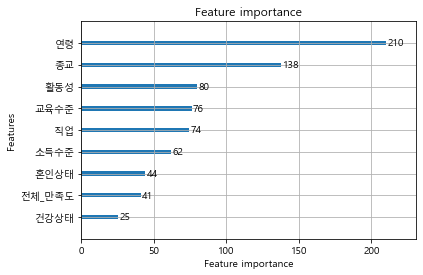

In [70]:
from lightgbm import plot_importance
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

plot_importance(lgbm_goss)

#### 하이퍼파라미터 튜닝

In [72]:
from bayes_opt import BayesianOptimization

pbounds = {'num_leaves':(100,1000),
            'learning_rate': (0.1, 0.3),
            'n_estimators': (300, 1000)              
          }

In [73]:
def LGBM_cv(num_leaves, learning_rate, n_estimators):
    model = LGBMClassifier( boosting_type='goss',
                            num_leaves=int(num_leaves),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators),
                            ramdom_state=2022)
    
    X_train, X_test, y_train, y_test = train_test_split(
        df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=2022)
    
    model.fit(X_train, y_train, eval_metric='multi_logloss')
    score = model.score(X_test, y_test)
    
    return score

In [74]:
bo=BayesianOptimization(f=LGBM_cv, pbounds=pbounds)
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   | learni... | n_esti... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  1        |  0.4988   |  0.2851   |  933.2    |  391.6    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  2        |  0.5107   |  0.1649   |  895.1    |  231.3    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  3        |  0.5036   |  0.1645   |  900.7    |  232.2    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  4        |  0.4821   |  0.1862   |  965.7    |  858.3    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  5        |  0.4726   |  0.2603   |  885.9    |  231.3    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  6        |  0.4988   |  0.1485   |  905.1    |  234.4    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  7        |  0.4654   |  0.2563   |  894.6    |  227.0    |
[LightGBM] [Warning] Unknown parameter: ramdom_state
|  8        |  0.5

In [75]:
lgbm_tune =LGBMClassifier(boosting_type='goss',
                        max_depth=-1,
                        learning_rate = 0.1333949321555854,
                        n_estimators = 446,
                        num_leaves = 750)
lgbm_tune.fit(X_train, y_train, eval_metric='multi_logloss', eval_set=evals)
lgbm_tune.score(X_test, y_test)

[1]	valid_0's multi_logloss: 1.12189
[2]	valid_0's multi_logloss: 1.11598
[3]	valid_0's multi_logloss: 1.1117
[4]	valid_0's multi_logloss: 1.11166
[5]	valid_0's multi_logloss: 1.11922
[6]	valid_0's multi_logloss: 1.1219
[7]	valid_0's multi_logloss: 1.12475
[8]	valid_0's multi_logloss: 1.13047
[9]	valid_0's multi_logloss: 1.13193
[10]	valid_0's multi_logloss: 1.13569
[11]	valid_0's multi_logloss: 1.13691
[12]	valid_0's multi_logloss: 1.14222
[13]	valid_0's multi_logloss: 1.14609
[14]	valid_0's multi_logloss: 1.14701
[15]	valid_0's multi_logloss: 1.14868
[16]	valid_0's multi_logloss: 1.15519
[17]	valid_0's multi_logloss: 1.16108
[18]	valid_0's multi_logloss: 1.16294
[19]	valid_0's multi_logloss: 1.15871
[20]	valid_0's multi_logloss: 1.16096
[21]	valid_0's multi_logloss: 1.1725
[22]	valid_0's multi_logloss: 1.17598
[23]	valid_0's multi_logloss: 1.17859
[24]	valid_0's multi_logloss: 1.18476
[25]	valid_0's multi_logloss: 1.18724
[26]	valid_0's multi_logloss: 1.19218
[27]	valid_0's multi_log

[258]	valid_0's multi_logloss: 1.55311
[259]	valid_0's multi_logloss: 1.55522
[260]	valid_0's multi_logloss: 1.54724
[261]	valid_0's multi_logloss: 1.55032
[262]	valid_0's multi_logloss: 1.54551
[263]	valid_0's multi_logloss: 1.54184
[264]	valid_0's multi_logloss: 1.54582
[265]	valid_0's multi_logloss: 1.55134
[266]	valid_0's multi_logloss: 1.54856
[267]	valid_0's multi_logloss: 1.5533
[268]	valid_0's multi_logloss: 1.55584
[269]	valid_0's multi_logloss: 1.55518
[270]	valid_0's multi_logloss: 1.5545
[271]	valid_0's multi_logloss: 1.55255
[272]	valid_0's multi_logloss: 1.54603
[273]	valid_0's multi_logloss: 1.54592
[274]	valid_0's multi_logloss: 1.54978
[275]	valid_0's multi_logloss: 1.55318
[276]	valid_0's multi_logloss: 1.55964
[277]	valid_0's multi_logloss: 1.56461
[278]	valid_0's multi_logloss: 1.56531
[279]	valid_0's multi_logloss: 1.56903
[280]	valid_0's multi_logloss: 1.57426
[281]	valid_0's multi_logloss: 1.57882
[282]	valid_0's multi_logloss: 1.57764
[283]	valid_0's multi_loglo

0.5465393794749404

In [76]:
accuracy_score(y_test, lgbm_goss.predict(X_test))

0.6420047732696897

In [77]:
accuracy_score(y_test, lgbm_tune.predict(X_test))

0.5465393794749404

#### 튜닝시 정확도가 떨어지는 결과

#### 에러측정

In [79]:
predict_test = lgbm_goss.predict(X_test)
predict_test_tune = lgbm_tune.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, predict_test)
mse_tune = mean_squared_error(y_test, predict_test_tune)

r2 = r2_score(y_test, predict_test)
r2_tune = r2_score(y_test, predict_test_tune)

In [81]:
print('Mean squared error: ', mse ,'/', mse_tune)
print('R2 score: ', r2 ,'/', r2_tune)

Mean squared error:  2.6181384248210025 / 2.7159904534606207
R2 score:  -0.4209229570733459 / -0.47402946686368974
